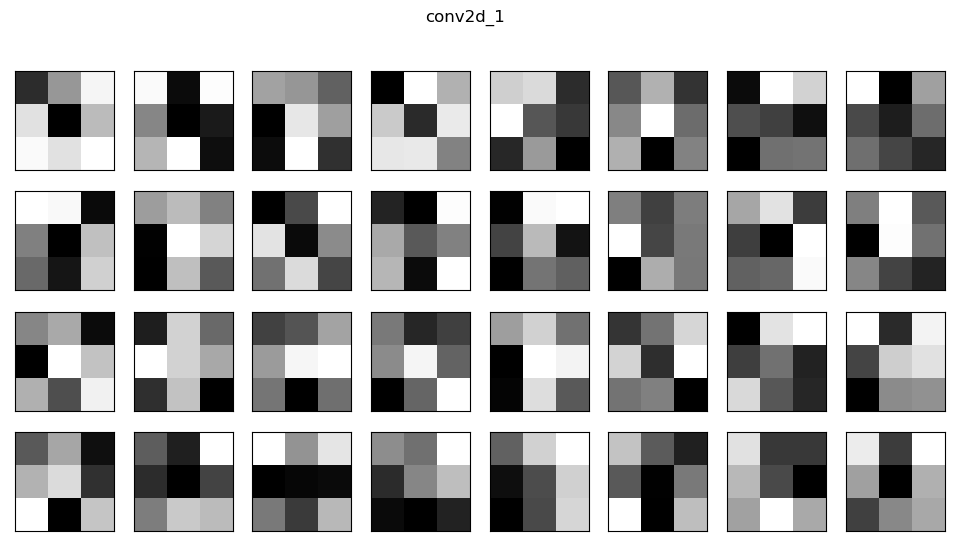

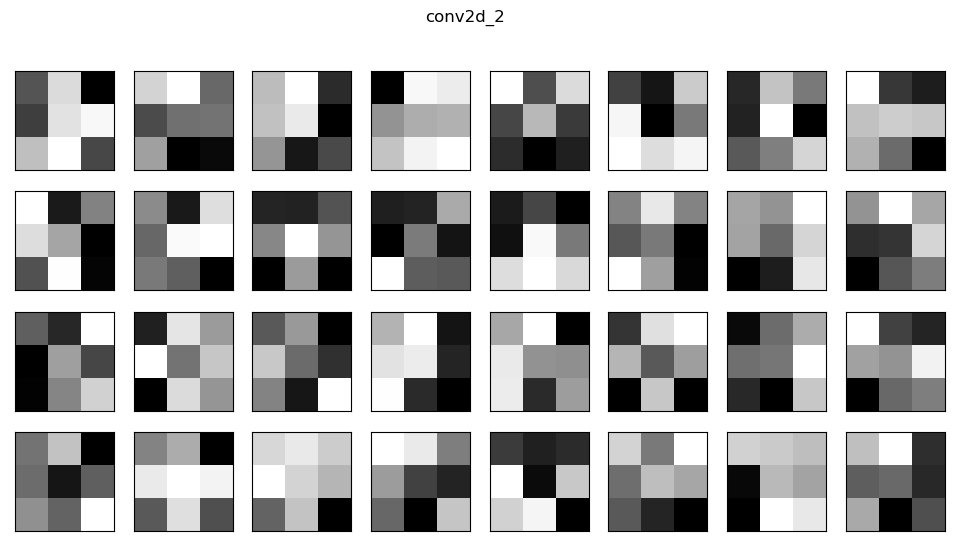

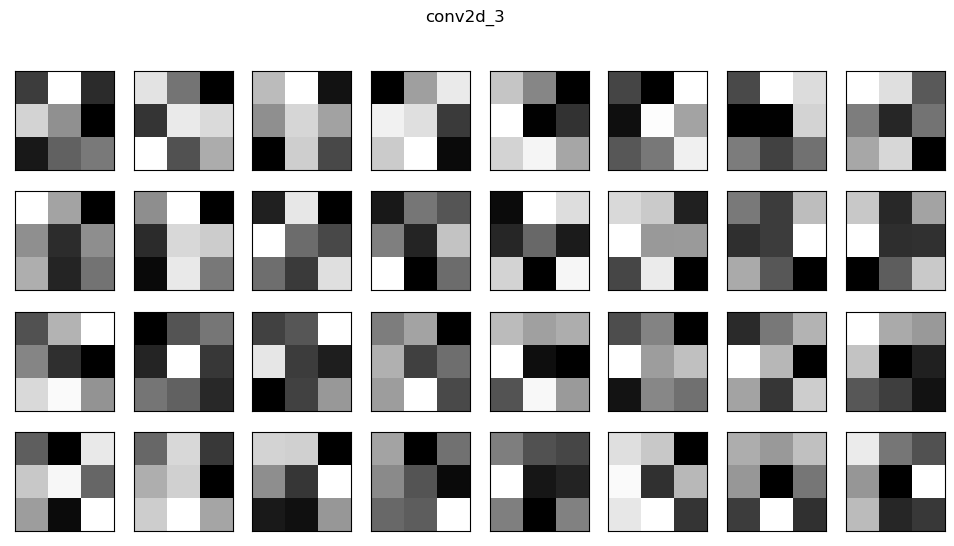

Epoch 1/3
   3/1875 [..............................] - ETA: 50s - loss: 2.2978 - accuracy: 0.1562 

2023-02-24 15:48:15.840807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 0.4660 - accuracy: 0.8303

2023-02-24 15:48:31.595790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 17s 9ms/step - loss: 0.4656 - accuracy: 0.8304 - val_loss: 0.3481 - val_accuracy: 0.8716
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3018 - accuracy: 0.8883 - val_loss: 0.3111 - val_accuracy: 0.8872
Epoch 3/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2566 - accuracy: 0.9035 - val_loss: 0.2925 - val_accuracy: 0.8946


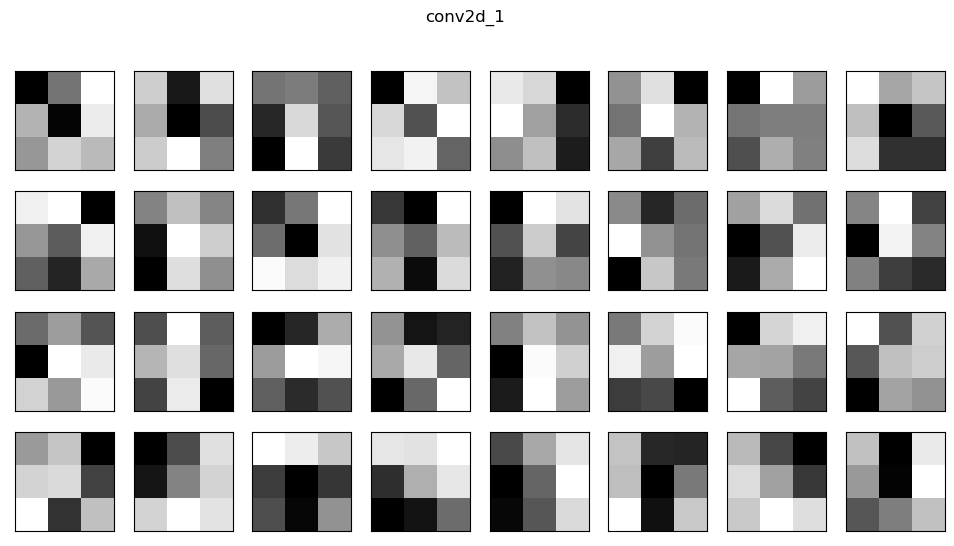

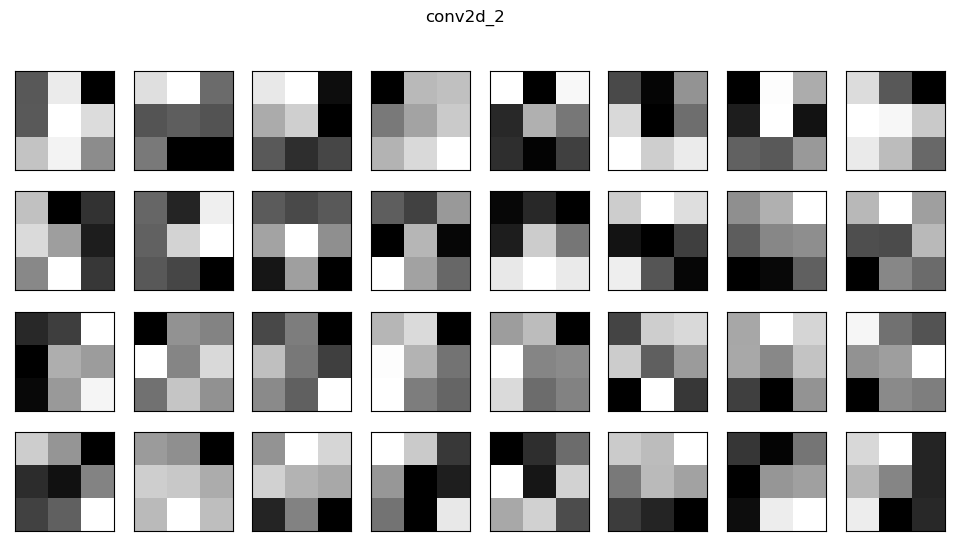

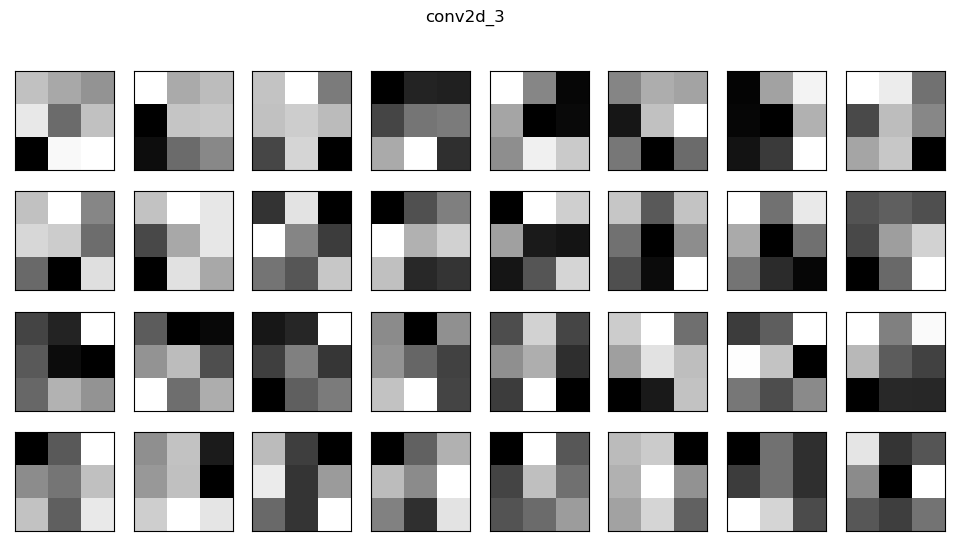

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv2d_1'),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling2d_1'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling2d_2'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', name='conv2d_3'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(128, activation='relu', name='dense_1'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the 3x3 kernel images on a grid before the training of the model
layer_names = ['conv2d_1', 'conv2d_2', 'conv2d_3']
for layer_name in layer_names:
    layer = model.get_layer(layer_name)
    weights = layer.get_weights()[0]
    fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
    fig.suptitle(layer_name)
    for i, ax in enumerate(axs.flat):
        if i < weights.shape[-1]:
            img = weights[:, :, 0, i]
            ax.imshow(img, cmap='gray')
        else:
            ax.axis('off')

plt.show()

# Train the model
history = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

# Display the 3x3 kernel images on a grid after the training of the model
for layer_name in layer_names:
    layer = model.get_layer(layer_name)
    weights = layer.get_weights()[0]
    fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
    fig.suptitle(layer_name)
    for i, ax in enumerate(axs.flat):
        if i < weights.shape[-1]:
            img = weights[:, :, 0, i]
            ax.imshow(img, cmap='gray')
        else:
            ax.axis('off')

plt.show()
